# Simple, but Unknown Circuit

This notebook asks you to construct a simple circuit based on a sketch. The circuit is parameterized by two sets of angles, each of which fully determines the state of one of the qubits.

In [1]:
from braket.circuits import  Circuit, FreeParameter

# Create a numeric value for the rotation angles
phi_1 = FreeParameter("phi_1")
theta_1 = FreeParameter("theta_1")
phi_2 = FreeParameter("phi_2")
theta_2 = FreeParameter("theta_2")

# Create a 2-qubit circuit
circuit = Circuit().ry(0, phi_1).rz(0, theta_1).ry(1, phi_2).rz(1, theta_2)

Now implement the rest of the circuit based on this diagramm.

![simple cicuit](images/simple_circuit.png)

If you need help, you can read the following hints:

<details>
<summary>Hint 1</summary>
Start with `circuit.`
</details>
<details>
<summary>Hint 2</summary>
The gates in the diagram are Controlled Not gates.
</details>
<details>
<summary>Hint 3</summary>
The black dot indicates the control qubit, the plus indicates the target qubit.
</details>
<details>
<summary>Hint 4</summary>
'circuit.cnot(control=0, target=1)' adds a Controlled Not gate to the circuit with qubit 1 as the control and quibit 2 as the target.
</details>

In [2]:
circuit.cnot(control=0, target=1).cnot(control=1, target=0).cnot(control=0, target=1)

Circuit('instructions': [Instruction('operator': Ry('angle': phi_1, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': theta_1, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': phi_2, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': theta_2, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(1), Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': Qub

## Experiments

Now that you have implemented the circuit, you can run experiments on it. Try to figure out what this circuit does to its two inputs.

If you're stuck, have a look at these hints.

<details>
<summary>Hint 1</summary>
First try using different states as inputs and see what the output is. You can also leave out your circuit to verify what the input is.
</details>
<details>
<summary>Hint 2</summary>
Try measuring something other than just |0〉and |1〉
</details>
<details>
<summary>Hint 3</summary>
If you measure the X Y and Z observables of a qubit, you can use those values to visualize the state of the qubit with the Bloch sphere.
</details>
<details>
<summary>Hint 4</summary>
You can use `circuit.sample(observable=Observable.X(), target=0)` to get an estimate of where on the X-axis in the Bloch sphere qubit 1 lies.
There is also a way to get a more exact results. You can read about it here: https://docs.aws.amazon.com/braket/latest/developerguide/braket-result-types.html
</details>

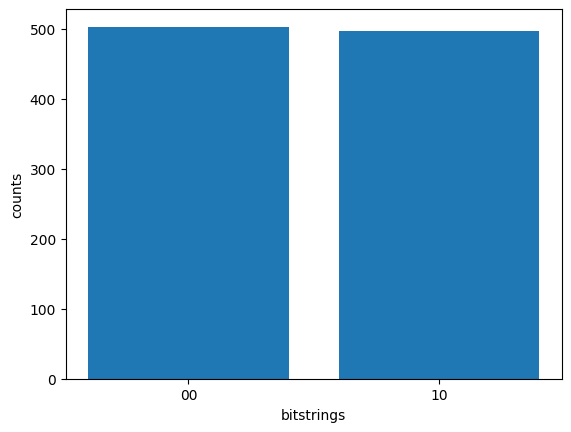

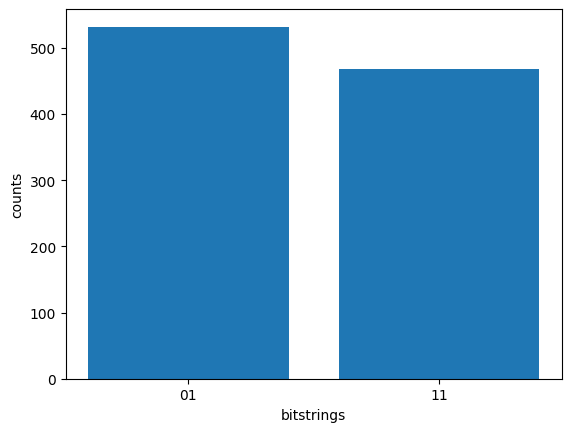

<Figure size 640x480 with 0 Axes>

In [3]:
from braket.devices import LocalSimulator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = LocalSimulator()

# Optionally do something with the circuit

runs = []

runs.append(device.run(circuit, inputs=dict(phi_1=0, theta_1=0, phi_2=np.pi/2, theta_2=0), shots=1000)) # |0〉 and |+〉
runs.append(device.run(circuit, inputs=dict(phi_1=np.pi, theta_1=0, phi_2=np.pi/2, theta_2=np.pi/2), shots=1000)) # |1〉 and |+y〉

results = [run.result().measurement_counts for run in runs]

for counts in results:
    plt.bar(counts.keys(), counts.values());
    plt.xlabel('bitstrings');
    plt.ylabel('counts');
    plt.show()
    plt.clf()

In [6]:
from braket.circuits import Observable

circuit.expectation(observable=Observable.X())
circuit.expectation(observable=Observable.Y())
circuit.expectation(observable=Observable.Z())

runs = []

runs.append(device.run(circuit, inputs=dict(phi_1=0, theta_1=0, phi_2=np.pi/2, theta_2=0), shots=0)) # |0〉 and |+〉
runs.append(device.run(circuit, inputs=dict(phi_1=np.pi, theta_1=0, phi_2=np.pi/2, theta_2=np.pi/2), shots=0)) # |1〉 and |+y〉

for run in runs:
    observables = [r.value for r in run.result().result_types]
    q1 = [obs[0] for obs in observables]
    q2 = [obs[1] for obs in observables]
    print(q1)
    print(q2)

[1.0, 0.0, 1.9967346175427393e-16]
[0.0, 0.0, 1.0]
[2.220446049250313e-16, 1.0, 2.220446049250313e-16]
[1.2246467991473532e-16, -3.1758977259765027e-34, -1.0]


We can visualize these on the Bloch sphere in the visualization_tools notebook.

```python
show_states(np.array([[1.0, 0.0, 1.9967346175427393e-16]]))
show_states(np.array([[0.0, 0.0, 1.0]]))
show_states(np.array([[2.220446049250313e-16, 1.0, 2.220446049250313e-16]]))
show_states(np.array([[1.2246467991473532e-16, -3.1758977259765027e-34, -1.0]]))
```

This gives us the following result for the first run.

![Bloch spheres](../images/run1.png)

We can see that the first qubit is |+〉and the second one |0〉. This is the opposite of what the inputs were. We see the same result for the second run or any other run we try. The circuit swaps the two inputs.